In [ ]:
############################################
### Exclusive clustering
############################################

    # Hard Clustering
    # DataPoint/Item belongs exlcusively to one cluster
    # K-Means Clustering is an exclusive clustering :)
        # Took screen of example, attach here
        

############################################
### What is K-Means?
############################################

     # K-Means goal is to group similar elements (data points) into a cluster
        # The K in K-Means refers to the number of clusters
    
     # Laundry metaphor
        # You have a pile of dirty clothes ready to wash but they all need to be washed a particular way
        # You decide to start with 3 different labels for wash-types
        
    # Your next step is to determine the "centroid" for each of the 3 clusters

    
############################################
### DOCUMENT CLASSIFICATION :))))))))))))))
############################################

    # Data must be in small dimensions
    # We can use it to group similar things from our randomly distributed dataset
    # Process: 
        # Create cluster of documents in multiple categories based on:
            # tags
            # topics
            # content of the document


############################################
### K-Means Example (11:10)
############################################

# You have data on a line that can be put into 3 clusters, K = 3g
### STEPS
    # 1) Select the number of clusters to be identified. K = 3
    # 2) Randomly select 3 distinct data points
    # 3) Measure the distance between the 1st point in the first cluster to the 1st point in the other 2 clusters
    # 4) Calculate the mean of the first cluster (Distance between first point and last point divided by 2
    # 5) Now measure the distance from the mean in the first cluster to the first point in the other 2 clusters
        # At the conclusion of this step the mean gets shifted 
    # 6) Now you can start addingpoints that are not yet assigned to a cluster, 
        # you do so by checking the distance of the point and the means of the 3 clusters
            # The point is assigned to the cluster that it is closest to
    
    ############################################
    ### This DID NOT produce good results, thus...
    ############################################
        
    # 7) You can check the quality of your clustering by adding together the variance of each cluster
    
    ############################################
    ### Repeat same priocess (Iteration 2)
    ############################################

    # This time new random points are chosen again,we must ensure they are different from the pints in the previous step
        # Repeat whole process
        
    ############################################
    ### Repeat same priocess (Iteration 3)
    ############################################

    # Same as iteration 2
    # BUT NOW the individual variation values are almost equal, whereas before the clusters were not equally favored
        # But we go for more and more iterations to keep fine-tuning it
            # ?????????????????????????? (below)
                # You can set the number of iterations you want it to do (Question for Mustafa)
            # The idea is that the changes in the variance should stop after a few iterations
                # Typically you will stop calculating when you get the same result consecutively
            
    ############################################
    ### Euclidian distance (Mustafa)
    ############################################
    
    # If we have our points displayed on a 2-d graph, we randomly select 3 points 
    # Same as pythageron theorom where we can calculate the hypotenuse based on the sum of the other 2 side's length
        # Use this to assign your point to the nearest cluster
    # Like above we must iterate multiple times to get the final result
    
    ############################################
    ### What should you set K to?
    ############################################
    
    # Trial and Error
        # Compare the difference in varianceto improve
    # AS the number of clusters increases the total variation decreases
        # PLOT the change in variance!
        # ELBOW POINT!!! (Drop a pic, Mustafa)
            # This is the point right before the graph begins to flatten
            # This point is used to determine the number of cluster!!!



In [1]:
### K-Means Algorithm :))))))))))))))))))))))))

# Pseudo-code

    # randomly choose k examples as initial centroids
    # while true:
    #     create k clusters by assigning each example to closest centroid
    #     compute k new centroids by averaging examples in each cluster

    #     if centroids don't change:
    #         break

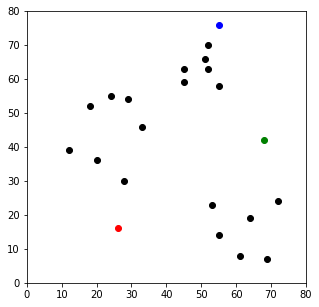

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Numbers are between 0 and 80
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

np.random.seed(200)
k = 3

# centroids[i] = [x,y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k') # Create scatter plot with x-axis = df['x'], y-axis = df['y']
    # For color = k, we set k so we get 3 colors since k = 3 :)
colmap= {1: 'r', 2: 'g', 3: 'b'} # Set 3 colors
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


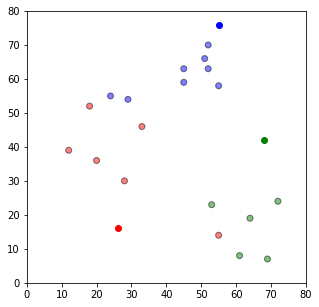

In [11]:
### Assignment Stage

def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        # Sum of squared error?
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2 
                 + (df['y'] - centroids[i][1]) **2
                    
                )
            )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x : int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x : colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)

# We always assign a point to its CLOSEST CLUSTER
plt.show()

In [12]:
# USING SKLEARN!!!

# Numbers are between 0 and 80
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

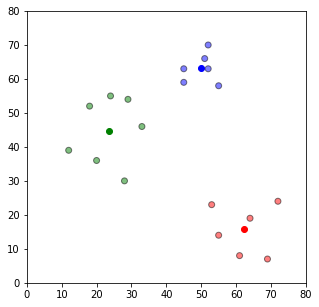

In [15]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'], df['y'], color=colors1, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)

# We always assign a point to its CLOSEST CLUSTER
plt.show()

In [ ]:
# K-Means is very sensitive to Euclidian Distance, so be sure to normalize the data or else scaling problems will occur
    # If there is symmetry in the data (Wont be thanks to tfidf!) it can cause the labels to be mislabeled
    # It is suggested to do the same K means with different initial centroids and take the most common label

In [22]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("closed"))
print(lemmatizer.lemmatize("closes"))
print(lemmatizer.lemmatize("closure"))

closed
close
closure


In [20]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jonah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
  
# choose some words to be stemmed 
words = ["closed", "closes", "closure", "closing"] 
  
for w in words: 
    print(w, " : ", ps.stem(w)) 

closed  :  close
closes  :  close
closure  :  closur
closing  :  close
